In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("Classified Data.csv",index_col=0)
df


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


#### AS data is in different scale , we have to scale our data()

In [3]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
sc = StandardScaler()
sc.fit(df.drop(["TARGET CLASS"] , axis=1)) # in fit , it computes the  mean and std dev for further scaling 

StandardScaler()

In [5]:
scaled_data = sc.transform(df.drop(["TARGET CLASS"],axis=1)) # it scales the fitted data with mean = 0 and std dev = 1

(array([[  0.,  16.,  89., 250., 253., 235., 123.,  33.,   1.,   0.],
        [  0.,  25.,  94., 201., 279., 248., 127.,  24.,   2.,   0.],
        [  0.,   7., 100., 254., 254., 228., 114.,  39.,   4.,   0.],
        [  1.,  11.,  93., 227., 310., 203., 125.,  23.,   3.,   4.],
        [  1.,  25.,  96., 193., 304., 243., 103.,  35.,   0.,   0.],
        [  0.,  17.,  88., 227., 289., 223., 122.,  30.,   4.,   0.],
        [  0.,  13.,  94., 237., 283., 234.,  99.,  35.,   5.,   0.],
        [  0.,  18.,  97., 220., 277., 233., 128.,  27.,   0.,   0.],
        [  0.,  17., 109., 216., 249., 246., 145.,  18.,   0.,   0.],
        [  7.,  16.,  93., 198., 278., 265., 123.,  20.,   0.,   0.]]),
 array([-3.54214006, -2.77282391, -2.00350776, -1.23419161, -0.46487545,
         0.3044407 ,  1.07375685,  1.843073  ,  2.61238916,  3.38170531,
         4.15102146]),
 <a list of 10 BarContainer objects>)

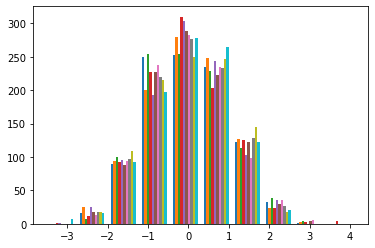

In [6]:
plt.hist(scaled_data)

In [7]:
df_scaled_data = pd.DataFrame(scaled_data,columns=df.columns[:-1])
df_scaled_data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


###  train test split of data

In [8]:
# do the train test split of data 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(scaled_data ,df["TARGET CLASS"], test_size=0.2)

In [9]:
X_train.shape

(800, 10)

###  Implementing KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_pred = knn_clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       101
           1       0.92      0.93      0.92        99

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



In [14]:
print(confusion_matrix(y_test , y_pred))

[[93  8]
 [ 7 92]]


In [15]:
print(accuracy_score(y_test , y_pred))

0.925


Now for k =1 , we have above accuracy , but there are many misclassified datapoints are there .
So to deal with this we have to find the best k value .

In [16]:
error = []
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors=i , n_jobs=-1)
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    error.append(np.mean(y_test != y_pred))

Text(0.5, 1.0, 'k-value VS Error rate')

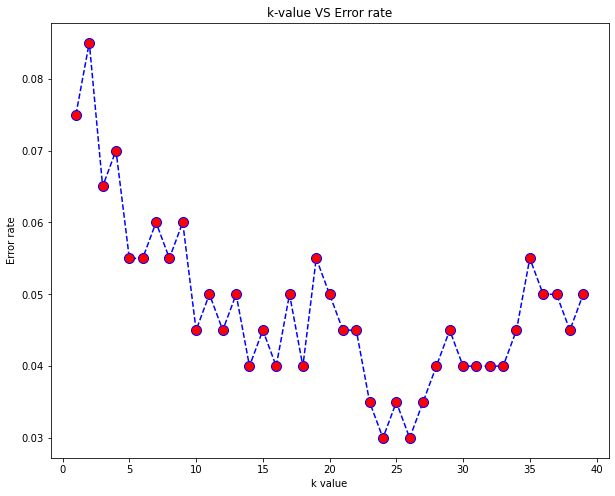

In [17]:
plt.figure(figsize=(10,8))  # figsize(width , height)
plt.plot(range(1,40) , error , color = 'blue' ,linestyle = 'dashed' , marker = 'o' , markerfacecolor = 'red' , markersize = 10)
plt.xlabel("k value")
plt.ylabel("Error rate")
plt.title("k-value VS Error rate")

#### Since after k = 34 , again error is increasing so we are taking 34 as a optimal k value

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
print("with k = 1 ")
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))


with k = 1 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       101
           1       0.92      0.93      0.92        99

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

[[93  8]
 [ 7 92]]


In [19]:
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
print("with k = 1 ")
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))


with k = 1 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       101
           1       0.95      0.96      0.95        99

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

[[96  5]
 [ 4 95]]
